In [13]:
import os
import fdtd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fdtd.set_backend("numpy")

In [3]:
grid = fdtd.Grid(
    shape = (200, 500, 1), # 25um x 15um x 1 (grid_spacing) --> 2D FDTD
    grid_spacing = 1e-7,
    permittivity = 1,
)

grid[0:10, :, :] = fdtd.PML(name="pml_xlow")
grid[-10:, :, :] = fdtd.PML(name="pml_xhigh")
grid[:, 0:10, :] = fdtd.PML(name="pml_ylow")
grid[:, -10:, :] = fdtd.PML(name="pml_yhigh")

In [4]:
simfolder = grid.save_simulation("test1")  # initializing environment to save simulation data
print(simfolder)

D:\Python\fdtd\examples\fdtd_output\fdtd_output_2023-4-26-18-59-58 (test1)


In [5]:
grid[0:200, 50, 0] = fdtd.LineSource(
    period = 491e-9 / (3e8), name="source"
)

In [6]:
grid[0:200, 60:400, 0] = fdtd.BlockDetector(name="detector")

In [7]:
refractive_index = 1.38/1.33
x = y = np.linspace(-1,1,100)
X, Y = np.meshgrid(x, y)
circle_mask = X**2 + Y**2 < 1
permittivity = np.ones((100,100,1))
permittivity += circle_mask[:,:,None]*(refractive_index**2 - 1)
grid[100:200, 100:200, 0] = fdtd.Object(permittivity=permittivity, name="object")

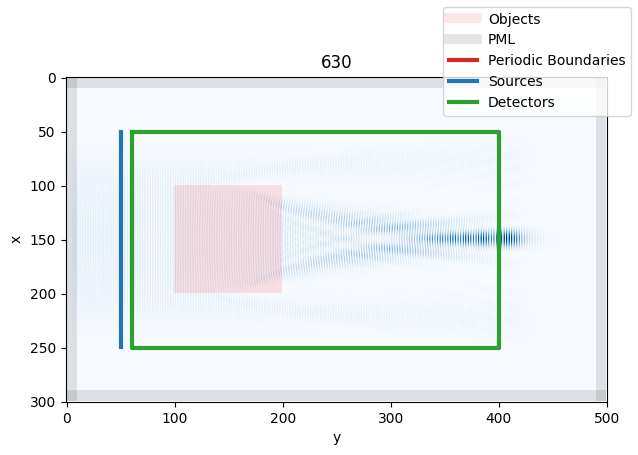

In [8]:
from IPython.display import clear_output # only necessary in jupyter notebooks
for i in range(0,640):
    grid.step()  # running simulation 1 timestep a time and animating
    if i % 10 == 0:
        # saving frames during visualization
        grid.visualize(z=0, animate=True, index=i, save=False, folder=simfolder)
        plt.title(f"{i:3.0f}")
        clear_output(wait=True) # only necessary in jupyter notebooks

grid.save_data()  # saving detector readings

100%|████████████████████████████████████████████████████████████████████████████████████| 201/201 [00:26<00:00,  7.59it/s]


Peak at: [[[100, 321]]]


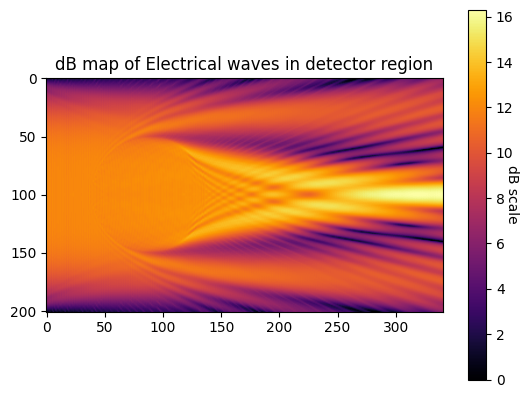

In [14]:
df = np.load(os.path.join(simfolder, "detector_readings.npz"))
fdtd.dB_map_2D(df["detector (E)"])